# The evolution of the presence of women’s voices in the media
Team ALLG : Amaia Soubelet, Lilian Haemmerli, Lucie Castella, Gabriel Juri

In [1]:
###Importing all the useful librairies

import time
import json
import bz2
import pandas as pd
import numpy as np
import re
from pathlib import Path
import matplotlib.pyplot as plt
import pyarrow as pa
import pyarrow.parquet as pq
import glob

### Handling data

In [5]:
###  IMPORTING DATA ###

# Define the path where the data is located

Path = "../quotes-2020.json.bz2" #goes out of the current folder


To decrease the running time, we uploaded and filtered the different year's data one by one on different computers. Here is how it was done for the year 2020. We just changed the path and the name of the output cvs file for the different years. At the end of this document, you can see those cvs files being loaded and the result of each year pictured in pie charts.

In [6]:
#Filtering functions

def find_proba(text):
    num = re.findall(r'-?\d+\.?\d*',text)
    return " ".join(num)

def filter_speakers(chunk_data):

    chunk_data['probas'] = chunk_data['probas'].astype('str')
    chunk_data['number'] = chunk_data['probas'].apply(lambda x: find_proba(x)) #extracts the probability of the given speaker to be correct
    filt_low = chunk_data.drop(chunk_data[chunk_data['number'] < '0.9'].index) #removes lines with low probabilities to have the right speaker (less than 90%)
    filt_prob = filt_low.drop(filt_low[filt_low['speaker'] == 'None'].index) #removes the lines with no speaker
    return filt_prob


The two functions above are used to filter the data. Every quote that does not have a speaker (the speaker is 'None') is removed. We also filtered the quotes depending on the probability that the given speaker is the right one. Every quote with a speaker probability of less than 0.9 was removed. Since our work is studying the gender of the speaker, we needed to be sure that the speakers linked to the quotations are the real speakers.

In [7]:
def process_chunk(chunk):
        print(f'Processing chunk with {len(chunk)} rows')
        print(chunk.columns)

with pd.read_json(Path, lines=True, compression='bz2', chunksize=1_000_000) as df_reader:
    dfs = []
    for chunk in df_reader:
        process_chunk(chunk)        
        filt_chunk = filter_speakers(chunk) #filters the lines we want to remove
        dfs.append(filt_chunk)

Processing chunk with 1000000 rows
Index(['quoteID', 'quotation', 'speaker', 'qids', 'date', 'numOccurrences',
       'probas', 'urls', 'phase'],
      dtype='object')
Processing chunk with 1000000 rows
Index(['quoteID', 'quotation', 'speaker', 'qids', 'date', 'numOccurrences',
       'probas', 'urls', 'phase'],
      dtype='object')
Processing chunk with 1000000 rows
Index(['quoteID', 'quotation', 'speaker', 'qids', 'date', 'numOccurrences',
       'probas', 'urls', 'phase'],
      dtype='object')
Processing chunk with 1000000 rows
Index(['quoteID', 'quotation', 'speaker', 'qids', 'date', 'numOccurrences',
       'probas', 'urls', 'phase'],
      dtype='object')
Processing chunk with 1000000 rows
Index(['quoteID', 'quotation', 'speaker', 'qids', 'date', 'numOccurrences',
       'probas', 'urls', 'phase'],
      dtype='object')
Processing chunk with 244449 rows
Index(['quoteID', 'quotation', 'speaker', 'qids', 'date', 'numOccurrences',
       'probas', 'urls', 'phase'],
      dtype='ob

In [8]:
chunk.head() #not filtered --> to check the difference

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,number
5000000,2020-03-06-047752,"People get killed in wildlife collisions, most...",Dave Marsden,[Q5240722],2020-03-06 17:20:36,3,"[['Dave Marsden', '0.6329'], ['None', '0.3671']]",[http://www.washingtontimes.com/news/2020/mar/...,E,0.6329 0.3671
5000001,2020-01-31-070691,People my age and older have to figure out how...,Michelle Buteau,[Q54861496],2020-01-31 17:47:00,2,"[['Michelle Buteau', '0.8651'], ['None', '0.13...",[https://www.nbcnews.com/news/nbcblk/michelle-...,E,0.8651 0.1349
5000002,2020-03-26-047932,People now have time on their hands and they w...,Gary Gray,"[Q21228842, Q3758498, Q5525157, Q5525158, Q552...",2020-03-26 19:43:00,1,"[['Gary Gray', '0.8611'], ['None', '0.1389']]",[http://capenews.net/sandwich/news/business-is...,E,0.8611 0.1389
5000003,2020-01-10-061824,People should not recourse to violent methods ...,Peter Machado,[Q1385539],2020-01-10 03:04:23,1,"[['Peter Machado', '0.9013'], ['None', '0.0987']]",[https://www.newkerala.com/news/2020/4460.htm],E,0.9013 0.0987
5000004,2020-04-02-047663,People think it's novel that 80-year-olds are ...,Candace Owens,[Q43302090],2020-04-02 12:27:27,2,"[['Candace Owens', '0.7324'], ['Anthony Fauci'...",[https://www.news18.com/news/world/alarm-denia...,E,0.7324 0.1735 0.0903 0.0038


In [9]:
filt_chunk.head() #filtered 

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,number
5000003,2020-01-10-061824,People should not recourse to violent methods ...,Peter Machado,[Q1385539],2020-01-10 03:04:23,1,"[['Peter Machado', '0.9013'], ['None', '0.0987']]",[https://www.newkerala.com/news/2020/4460.htm],E,0.9013 0.0987
5000016,2020-03-18-052109,"Please stay away... while crews assess damage,",Gary Herbert,[Q881188],2020-03-18 08:48:00,1,"[['Gary Herbert', '0.9404'], ['None', '0.0596']]",[https://www.cityweekly.net/BuzzBlog/archives/...,E,0.9404 0.0596
5000022,2020-01-24-066016,possibility of a heart bypass cannot be ruled out,"Victoria , Crown Princess of Sweden",[Q156390],2020-01-24 18:54:14,5,"[['Victoria , Crown Princess of Sweden', '0.90...",[https://www.geo.tv/latest/268956-nawaz-sharif...,E,0.9058 0.0942
5000033,2020-02-15-035807,"Previously, many things were given flexibility...",Eddin Syazlee Shith,[Q55584836],2020-02-15 16:24:42,1,"[['Eddin Syazlee Shith', '0.9581'], ['None', '...",[http://bernama.com/general/news.php?id=1814213],E,0.9581 0.0419
5000035,2020-04-15-045130,Pritzker using a coronavirus briefing to campa...,Tim Schneider,"[Q18745477, Q19663584, Q28466557]",2020-04-15 00:00:00,1,"[['Tim Schneider', '0.9489'], ['None', '0.0511']]",[http://dailyherald.com/news/20200415/pritzker...,E,0.9489 0.0511


In [10]:
pd.concat(dfs)

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,number
7,2020-01-17-000357,[ The delay ] will have an impact [ on Slough ...,Dexter Smith,[Q5268447],2020-01-17 13:03:00,1,"[['Dexter Smith', '0.924'], ['None', '0.076']]",[http://www.sloughexpress.co.uk/gallery/slough...,E,0.924 0.076
8,2020-04-02-000239,[ The scheme ] treats addiction as an illness ...,Barry Coppinger,[Q4864119],2020-04-02 14:18:20,1,"[['Barry Coppinger', '0.9017'], ['None', '0.09...",[http://www.theweek.co.uk/106479/why-police-ar...,E,0.9017 0.0983
9,2020-03-19-000276,[ These ] actions will allow households who ha...,Ben Carson,[Q816459],2020-03-19 19:14:00,1,"[['Ben Carson', '0.9227'], ['None', '0.0773']]",[https://mortgageorb.com/hud-fha-suspend-forec...,E,0.9227 0.0773
16,2020-01-08-000594,"11 straight weeks of pre-season,",Aphelele Fassi,[Q56255401],2020-01-08 10:22:11,1,"[['Aphelele Fassi', '0.9033'], ['None', '0.096...",[https://www.sport24.co.za/Rugby/SuperRugby/sh...,E,0.9033 0.0967
19,2020-02-21-000455,2019 was a landmark year for Fiverr as we comp...,Micha Kaufman,[Q26923564],2020-02-21 13:00:00,1,"[['Micha Kaufman', '0.9409'], ['None', '0.0591']]",[https://www.fool.com/investing/2020/02/21/why...,E,0.9409 0.0591
...,...,...,...,...,...,...,...,...,...,...
5244412,2020-03-24-093541,You can't get social distance in a submarine a...,Mark Esper,[Q33190271],2020-03-24 22:32:54,1,"[['Mark Esper', '0.9434'], ['None', '0.0566']]",[https://news.usni.org/2020/03/24/navy-adapts-...,E,0.9434 0.0566
5244424,2020-03-28-040445,You Know I' m No Good,Amy Winehouse,[Q15897],2020-03-28 17:00:40,1,"[['Amy Winehouse', '0.9469'], ['None', '0.0477...",[https://www.goldderby.com/article/2020/the-ma...,E,0.9469 0.0477 0.0021 0.0019 0.0014
5244435,2020-02-02-058890,You understood the structure of our story and ...,Bong Joon Ho,[Q495980],2020-02-02 08:27:01,4,"[['Bong Joon Ho', '0.9476'], ['None', '0.0454'...",[https://www.prokerala.com/news/articles/a1003...,E,0.9476 0.0454 0.004 0.0015 8.0 -4 7.0 -4
5244437,2020-01-28-115305,You'd probably be able to do that every now an...,Michael Maguire,"[Q3856214, Q4274205, Q42887501, Q6832442, Q683...",2020-01-28 23:26:18,1,"[['Michael Maguire', '0.9191'], ['None', '0.08...",[http://www.nrl.com/news/2020/01/29/tigers-and...,E,0.9191 0.0809


In [27]:
df = pd.concat(dfs)
df['qids'] = df['qids'].str[0]

### Adding the .parquet database given 

In [13]:
### NO NEED TO RUN AGAIN!!
### Merging and importing parquet files into csv

from pathlib import Path

data_dir = Path('C:/data/speaker_attributes.parquet')
for i, parquet_path in enumerate(data_dir.glob('*.parquet')):
    df = pd.read_parquet(parquet_path)
    write_header = i == 0 # write header only on the 0th file
    write_mode = 'w' if i == 0 else 'a' # 'write' mode for 0th file, 'append' otherwise
    df.to_csv('featuresQID.csv', mode=write_mode, header=write_header)

In [23]:
### Merging qotes and gender charateristic of each speaker 

featuresQID = pd.read_csv('featuresQID.csv',low_memory=False)
featuresQID
#featuresQID = featuresQID.rename(columns = {'id':'qids'})
#dff = pd.merge(df,featuresQID[['qids','gender']],on='qids', how='left')

,Unnamed: 0,aliases,date_of_birth,nationality,gender,lastrevid,ethnic_group,US_congress_bio_ID,occupation,party,academic_degree,id,label,candidacy,type,religion
0,0,['Washington' 'President Washington' 'G. Washi...,['+1732-02-22T00:00:00Z'],['Q161885' 'Q30'],['Q6581097'],1395141751,NaN,W000178,['Q82955' 'Q189290' 'Q131512' 'Q1734662' 'Q294...,['Q327591'],NaN,Q23,George Washington,['Q698073' 'Q697949'],item,['Q682443']
1,1,['Douglas Noel Adams' 'Douglas Noël Adams' 'Do...,['+1952-03-11T00:00:00Z'],['Q145'],['Q6581097'],1395737157,['Q7994501'],NaN,['Q214917' 'Q28389' 'Q6625963' 'Q4853732' 'Q18...,NaN,NaN,Q42,Douglas Adams,NaN,item,NaN
2,2,['Paul Marie Ghislain Otlet' 'Paul Marie Otlet'],['+1868-08-23T00:00:00Z'],['Q31'],['Q6581097'],1380367296,NaN,NaN,['Q36180' 'Q40348' 'Q182436' 'Q1265807' 'Q2053...,NaN,NaN,Q1868,Paul Otlet,NaN,item,NaN
3,3,['George Walker Bush' 'Bush Jr.' 'Dubya' 'GWB'...,['+1946-07-06T00:00:00Z'],['Q30'],['Q6581097'],1395142029,NaN,NaN,['Q82955' 'Q15982858' 'Q18814623' 'Q1028181' '...,['Q29468'],NaN,Q207,George W. Bush,['Q327959' 'Q464075' 'Q3586276' 'Q4450587'],item,['Q329646' 'Q682443' 'Q33203']
4,4,['Velázquez' 'Diego Rodríguez de Silva y Veláz...,['+1599-06-06T00:00:00Z'],['Q29'],['Q6581097'],1391704596,NaN,NaN,['Q1028181'],NaN,NaN,Q297,Diego Velázquez,NaN,item,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9055976,639477,['Barker Howard'],NaN,['Q30'],['Q6581097'],1397399351,NaN,NaN,['Q82955'],NaN,NaN,Q106406560,Barker B. Howard,NaN,item,NaN
9055977,639478,['Charles Macomber'],NaN,['Q30'],['Q6581097'],1397399471,NaN,NaN,['Q82955'],NaN,NaN,Q106406571,Charles H. Macomber,NaN,item,NaN
9055978,639479,NaN,['+1848-04-01T00:00:00Z'],NaN,['Q6581072'],1397399751,NaN,NaN,NaN,NaN,NaN,Q106406588,Dina David,NaN,item,NaN
9055979,639480,NaN,['+1899-03-18T00:00:00Z'],NaN,['Q6581072'],1397399799,NaN,NaN,NaN,NaN,NaN,Q106406593,Irma Dexinger,NaN,item,NaN


In [25]:
featuresQID = featuresQID.rename(columns = {'id':'qids'})
featuresQID

,Unnamed: 0,aliases,date_of_birth,nationality,gender,lastrevid,ethnic_group,US_congress_bio_ID,occupation,party,academic_degree,qids,label,candidacy,type,religion
0,0,['Washington' 'President Washington' 'G. Washi...,['+1732-02-22T00:00:00Z'],['Q161885' 'Q30'],['Q6581097'],1395141751,NaN,W000178,['Q82955' 'Q189290' 'Q131512' 'Q1734662' 'Q294...,['Q327591'],NaN,Q23,George Washington,['Q698073' 'Q697949'],item,['Q682443']
1,1,['Douglas Noel Adams' 'Douglas Noël Adams' 'Do...,['+1952-03-11T00:00:00Z'],['Q145'],['Q6581097'],1395737157,['Q7994501'],NaN,['Q214917' 'Q28389' 'Q6625963' 'Q4853732' 'Q18...,NaN,NaN,Q42,Douglas Adams,NaN,item,NaN
2,2,['Paul Marie Ghislain Otlet' 'Paul Marie Otlet'],['+1868-08-23T00:00:00Z'],['Q31'],['Q6581097'],1380367296,NaN,NaN,['Q36180' 'Q40348' 'Q182436' 'Q1265807' 'Q2053...,NaN,NaN,Q1868,Paul Otlet,NaN,item,NaN
3,3,['George Walker Bush' 'Bush Jr.' 'Dubya' 'GWB'...,['+1946-07-06T00:00:00Z'],['Q30'],['Q6581097'],1395142029,NaN,NaN,['Q82955' 'Q15982858' 'Q18814623' 'Q1028181' '...,['Q29468'],NaN,Q207,George W. Bush,['Q327959' 'Q464075' 'Q3586276' 'Q4450587'],item,['Q329646' 'Q682443' 'Q33203']
4,4,['Velázquez' 'Diego Rodríguez de Silva y Veláz...,['+1599-06-06T00:00:00Z'],['Q29'],['Q6581097'],1391704596,NaN,NaN,['Q1028181'],NaN,NaN,Q297,Diego Velázquez,NaN,item,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9055976,639477,['Barker Howard'],NaN,['Q30'],['Q6581097'],1397399351,NaN,NaN,['Q82955'],NaN,NaN,Q106406560,Barker B. Howard,NaN,item,NaN
9055977,639478,['Charles Macomber'],NaN,['Q30'],['Q6581097'],1397399471,NaN,NaN,['Q82955'],NaN,NaN,Q106406571,Charles H. Macomber,NaN,item,NaN
9055978,639479,NaN,['+1848-04-01T00:00:00Z'],NaN,['Q6581072'],1397399751,NaN,NaN,NaN,NaN,NaN,Q106406588,Dina David,NaN,item,NaN
9055979,639480,NaN,['+1899-03-18T00:00:00Z'],NaN,['Q6581072'],1397399799,NaN,NaN,NaN,NaN,NaN,Q106406593,Irma Dexinger,NaN,item,NaN


In [28]:
dff = pd.merge(df,featuresQID[['qids','gender']],on='qids', how='left')

In [29]:
dff['gender'].value_counts()

['Q6581097']                         575817
['Q6581072']                         111093
['Q1052281']                            504
['Q48270']                              242
['Q18116794']                            88
['Q2449503']                             67
['Q6581097' 'Q179294']                   42
['Q48270' 'Q6581072']                    23
['Q1984232']                             21
['Q6581072' 'Q48270']                    18
['Q15145778']                            15
['Q6581097' 'Q189125']                   14
['Q15145779']                            10
['Q12964198']                             6
['Q1097630' 'Q48270']                     5
['Q27679766' 'Q859614']                   4
['Q48270' 'Q12964198']                    4
['Q15145779' 'Q1097630']                  4
['Q6581097' 'Q6581072']                   3
['Q6581072' 'Q6581097']                   2
['Q48270' 'Q189125']                      2
['Q1289754']                              1
['Q2449503' 'Q48270' 'Q12964198'

### Counting gender proportions

In [30]:
def gender(x):
    
    'Function to convert wikidata id into a gender string value'
    'We consider male and female as male/female and transgender male/female respectly'

    if x == "['Q6581097']" or x =="['Q2449503']": #males and transgender males
        return 'male'
    elif x == "['Q6581072']" or  x ==  "['Q1052281']": #females and transgender females
        return 'female'
    elif pd.isna(x):
        return np.nan
    else:
        return 'other'

dff['gen'] = dff['gender'].apply(gender)
dff['gen'].value_counts(dropna=False)

male      575884
female    111597
NaN        13523
other        510
Name: gen, dtype: int64

In [31]:
import pickle
path ='gen_2020.pickle'
# Store data (serialize)
with open(path, 'wb') as handle:
    pickle.dump(dff[['qids','quoteID','gen']], handle, protocol=pickle.HIGHEST_PROTOCOL)

dff[['qids','quoteID','gen']]
pd.DataFrame.from_dict(data=dff[['qids','quoteID','gen']], orient='columns').to_csv("gen_2020.csv", header=False)

In [33]:
pd.DataFrame.from_dict(data=dff[['qids','quoteID','gen','quotation']], orient='columns').to_csv("tot_2020.csv", header=False)

### A first glance to the data:
cvs files of every year (that were generated one by one on our different computers using the code above) are now being loaded and presented in graphs. 

In [31]:
# load the csv files of all the years into one dataframe
# set the header

gen15 = pd.read_csv('gen_2015.csv', header = None, index_col=False)
gen16 = pd.read_csv('gen_2016.csv', header = None, index_col=False)
gen17 = pd.read_csv('gen_2017.csv', header = None, index_col=False)
gen18 = pd.read_csv('gen_2018.csv', header = None, index_col=False)
gen19 = pd.read_csv('gen_2019.csv', header = None, index_col=False)
gen20 = pd.read_csv('gen_2020.csv', header = None, index_col=False)

df = gen15.append([gen16,gen17,gen18,gen19,gen20])
df.rename(columns={1: 'qids', 2: 'Date', 3: 'Gender'}, inplace=True)
df.head()

,0,qids,Date,Gender
0,0,Q5107822,2015-03-22-011043,male
1,1,Q42969376,2015-07-22-000568,female
2,2,Q7199798,2015-03-26-025269,male
3,3,Q29654671,2015-08-12-028781,male
4,4,Q7356142,2015-12-24-000354,male


In [32]:
# split the date column into different columns to get rid of the last 7 characters (minutes and seconds)

df[['Year','Month','Day','Secs']] = df.Date.str.split("-",expand=True)
df.head()

,0,qids,Date,Gender,Year,Month,Day,Secs
0,0,Q5107822,2015-03-22-011043,male,2015,03,22,011043
1,1,Q42969376,2015-07-22-000568,female,2015,07,22,000568
2,2,Q7199798,2015-03-26-025269,male,2015,03,26,025269
3,3,Q29654671,2015-08-12-028781,male,2015,08,12,028781
4,4,Q7356142,2015-12-24-000354,male,2015,12,24,000354


In [33]:
# set all the values of the day column to 15
# so that we can plot the percentage per month more easily

df.Day=15
df

,0,qids,Date,Gender,Year,Month,Day,Secs
0,0,Q5107822,2015-03-22-011043,male,2015,03,15,011043
1,1,Q42969376,2015-07-22-000568,female,2015,07,15,000568
2,2,Q7199798,2015-03-26-025269,male,2015,03,15,025269
3,3,Q29654671,2015-08-12-028781,male,2015,08,15,028781
4,4,Q7356142,2015-12-24-000354,male,2015,12,15,000354
...,...,...,...,...,...,...,...,...
701509,701509,Q33190271,2020-03-24-093541,male,2020,03,15,093541
701510,701510,Q15897,2020-03-28-040445,female,2020,03,15,040445
701511,701511,Q495980,2020-02-02-058890,male,2020,02,15,058890
701512,701512,Q3856214,2020-01-28-115305,male,2020,01,15,115305


In [34]:
# drop columns not needed anymore

df=df.drop(columns=['Secs', 'Date'])

# create the new Date column without the "minutes and seconds"

df['Date'] = df['Day'].map(str) + '-' + df['Month'].map(str) + '-' + df['Year'].map(str)
df.head()

# drop all the rows that contain NaN

df=df.dropna()

In [35]:
# convert the date column into a datetime object

df['Date'] = pd.to_datetime(df['Date'])
df.head()

,0,qids,Gender,Year,Month,Day,Date
0,0,Q5107822,male,2015,03,15,2015-03-15
1,1,Q42969376,female,2015,07,15,2015-07-15
2,2,Q7199798,male,2015,03,15,2015-03-15
3,3,Q29654671,male,2015,08,15,2015-08-15
4,4,Q7356142,male,2015,12,15,2015-12-15


In [36]:
# convert the date column to an index

df.index = df['Date']
del df['Date']
print(df.head())

            0       qids  Gender  Year Month  Day
Date                                             
2015-03-15  0   Q5107822    male  2015    03   15
2015-07-15  1  Q42969376  female  2015    07   15
2015-03-15  2   Q7199798    male  2015    03   15
2015-08-15  3  Q29654671    male  2015    08   15
2015-12-15  4   Q7356142    male  2015    12   15


In [37]:
# groupby to get the number of speaker per gender and month

df1 = df.groupby(['Gender', 'Date', 'Year', 'Month']).size().reset_index(name='counts')
df1

,Gender,Date,Year,Month,counts
0,female,2015-01-15,2015,01,25395
1,female,2015-02-15,2015,02,26293
2,female,2015-03-15,2015,03,29956
3,female,2015-04-15,2015,04,23872
4,female,2015-05-15,2015,05,18084
...,...,...,...,...,...
187,other,2019-12-15,2019,12,143
188,other,2020-01-15,2020,01,150
189,other,2020-02-15,2020,02,140
190,other,2020-03-15,2020,03,161


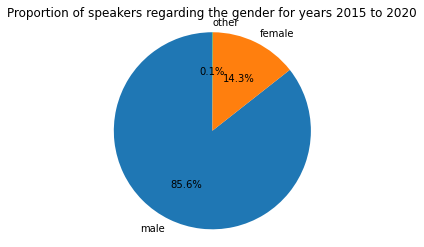

In [34]:
### Chart of all years together --> mean

male = allyears[allyears['gender'] == 'male'].gender.count()
female = allyears[allyears['gender'] == 'female'].gender.count()
other = allyears[allyears['gender'] == 'other'].gender.count()
total = male + female + other
# import the pyplot library

import matplotlib.pyplot as plotter
# The slice names of a population distribution pie chart
labels = ['male','female','other']
# Population data
sizes = [male/total, female/total, other/total]
figureObject, axesObject = plotter.subplots()

# Draw the pie chart
axesObject.pie(sizes,
 
       labels=labels,
        autopct='%1.1f%%',
        startangle=90)
# Aspect ratio - equal means pie is a circle

axesObject.axis('equal')
plt.title('Proportion of speakers regarding the gender for years 2015 to 2020');
plotter.show()

In [11]:
# Cheking the extact proportion by year and gender
pd.DataFrame(pd.crosstab(df.index.year, df.Gender,normalize='index').mul(100))

Gender,female,male,other
row_0,,,
2015,12.675889,87.247172,0.076939
2016,13.412064,86.525504,0.062433
2017,13.970023,85.949300,0.080677
2018,14.893490,85.023715,0.082795
2019,15.710181,84.200842,0.088977
2020,16.220706,83.705165,0.074129


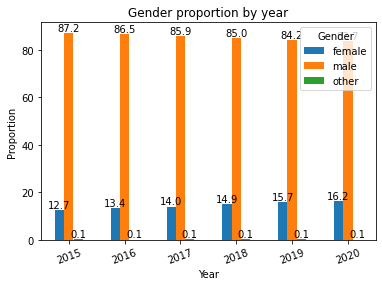

In [4]:
# Plotting gender proportion by year
import seaborn as sns

ax = data2.plot.bar(stacked=False)

for container in ax.containers:          # loop to consider the gender percentage in each year
    ax.bar_label(container,fmt='%.1f')
    
plt.xticks(rotation=20);
plt.xlabel('Year');
plt.ylabel('Proportion');
plt.title('Gender proportion by year');

# Testing if there exist a differnce in the propotion of woman as speaker through the time

### Is there a significant difference between the proportion of womens as speakers before and after 2017 (Mee two Movement)?

In [8]:
before = pd.DataFrame(df[df.index.year <= 2015].Gender.value_counts()).rename(columns={'Gender': 'before'})
after =  pd.DataFrame(df[df.index.year  >= 2020].Gender.value_counts()).rename(columns={'Gender': 'after'})

beaf = pd.concat([before,after],axis = 1)

# For normal distributed data
def comparing_two_proportions (p1,p2,n1,n2):
   
    '''
           Function to compare if two proportion are different.
    
    *   Significance level -ref- = 0.05
    *   Proportion of the first group = p1
    *   
    *   Proportion of the second group = p2
    *
    '''
    
    ref = 1.96
    p = (n1*p1+n2*p2)/(n1+n2)
    n1n2 = (1/n1)+(1/n2)
    z = (p1-p2)/np.sqrt(p*(1-p)*n1n2)
    
    if -ref<z<ref:
        print('No statisttical difference')
   
    elif -ref>z:
        print(f'Since Zscore is lower than {-ref} the null hypothesis is rejected, and therefore there is a significan difference')     
    else: 
        print(f'Since Zscore is higher than {ref} the null hypothesis is rejected, and therefore there is a significan difference')

comparing_two_proportions (0.139700,0.162207,3226430,687991);

Since Zscore is lower than -1.96 the null hypothesis is rejected, and therefore there is a significan difference


### Is there a significant difference between the proportion of womens as speakers between 2017 and 2020 ?

In [28]:
prp_2017 = pd.DataFrame(df[df.index.year == 2017].Gender.value_counts(normalize = True)).rename(columns={'Gender': '2017'})
prp_2020 =  pd.DataFrame(df[df.index.year == 2020].Gender.value_counts(normalize = True)).rename(columns={'Gender': '2017'})

beaf = pd.concat([prp_2017,prp_2020],axis = 1)

comparing_two_proportions (0.1397,0.162207,450733,111597)

Since Zscore is lower than -1.96 the null hypothesis is rejected, and therefore there is a significan difference


# Time Series Analysis of female speaker percentage

In [38]:
# change structure of the dataframe 

df2=df1.pivot(index=['Date','Year','Month'], columns='Gender', values='counts') # for linear regression
df3=df1.pivot(index=['Date'], columns='Gender', values='counts') # to check for stationarity

In [39]:
# calculate the percentage of female speaker per month 
# by diving the amount of female speakers by the total amount of speakers

df2['perc_fem'] = df2.female/(df2.female+df2.male+df2.other)
df3['perc_fem'] = df3.female/(df3.female+df3.male+df3.other)
df2.head()

,,Gender,female,male,other,perc_fem
Date,Year,Month,,,,
2015-01-15,2015,01,25395,184035,153,0.121169
2015-02-15,2015,02,26293,183104,181,0.125457
2015-03-15,2015,03,29956,209105,120,0.125244
2015-04-15,2015,04,23872,164781,64,0.126496
2015-05-15,2015,05,18084,124481,96,0.126762


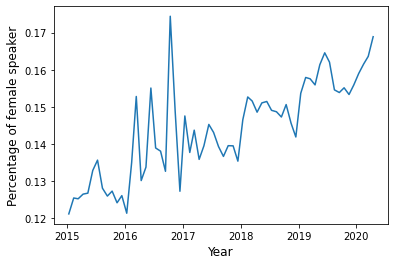

In [40]:
# plot the time series
import seaborn as sns

p = sns.lineplot(data=df2, x="Date", y="perc_fem")
p.set_xlabel("Year", fontsize = 12)
p.set_ylabel("Percentage of female speaker", fontsize = 12);

TypeError: _set_ticklabels() missing 1 required positional argument: 'labels'

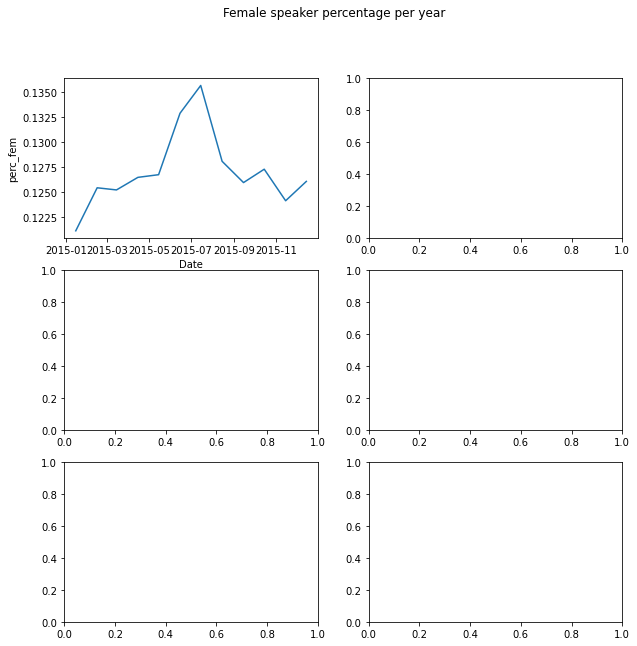

In [68]:

# make subsets per year and plot them

perc_2015 = df2['2015-01-15':'2015-12-15']
perc_2016 = df2['2016-01-15':'2016-12-15']
perc_2017 = df2['2017-01-15':'2017-12-15']
perc_2018 = df2['2018-01-15':'2018-12-15']
perc_2019 = df2['2019-01-15':'2019-12-15']
perc_2020 = df2['2020-01-15':'2020-04-15']

fig, axes = plt.subplots(3,2, figsize=(10, 10))
fig.suptitle('Female speaker percentage per year')

sns.lineplot(ax=axes[0,0], data=perc_2015, x="Date", y="perc_fem")
sns.lineplot(ax=axes[0,1], data=perc_2016, x="Date", y="perc_fem").set(ylabel="Percentage of female speaker", xlabel='Year')
sns.lineplot(ax=axes[1,0], data=perc_2017, x="Date", y="perc_fem").set(ylabel="Percentage of female speaker", xlabel='Year')
sns.lineplot(ax=axes[1,1], data=perc_2018, x="Date", y="perc_fem").set(ylabel="Percentage of female speaker", xlabel='Year')
sns.lineplot(ax=axes[2,0], data=perc_2019, x="Date", y="perc_fem").set(ylabel="Percentage of female speaker", xlabel='Year')
sns.lineplot(ax=axes[2,1], data=perc_2020, x="Date", y="perc_fem").set(ylabel="Percentage of female speaker", xlabel='Year')

fig.tight_layout(pad=3.0);


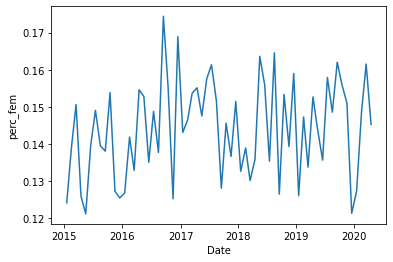

In [47]:
# time series plot by shuffling of data -> this is how plot would look like if no trend

dfshuf = df2.copy()
dfshuf['perc_fem'] = df2.perc_fem.sample(frac=1).values
sns.lineplot(data=dfshuf, x="Date", y="perc_fem");

### Trend detection by checking for stationarity

Already by eye we can assume that there is an increasing trend in the percentage of female speakers in the data. 
Stationarity is a key part of time series analysis. Stationarity means that the manner in which time series data changes is constant. A stationary time series will not have any trends or seasonal patterns. Here we will use the Dickey Fuller test to check for stationarity in our data. This test will generate critical values and a p-value, which will allow us to accept or reject the null hypothesis that there is no stationarity. If we reject the null hypothesis, we accept the alternative, which states that there is stationarity.

In [48]:
# drop columns not needed anymore

df3=df3.drop(columns=['female', 'male','other'])

In [49]:
# check for stationarity with the Dickey Fuller test

rolling_mean = df3.rolling(7).mean()
rolling_std = df3.rolling(7).std()

In [50]:
df3

Gender,perc_fem
Date,
2015-01-15,0.121169
2015-02-15,0.125457
2015-03-15,0.125244
2015-04-15,0.126496
2015-05-15,0.126762
...,...
2019-12-15,0.155894
2020-01-15,0.158987
2020-02-15,0.161525


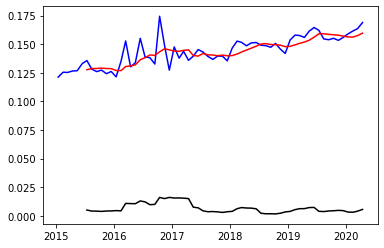

In [51]:
plt.plot(df3, color="blue", label="Original percentage of female speaker")
plt.plot(rolling_mean, color="red", label="Rolling Mean female percentage")
plt.plot(rolling_std, color="black", label = "Rolling Standard Deviation female percentage");

In the plot above we can see that the standard deviation in 2016 and the beginning of 2017 is bigger than in the rest of the data. This result from the fact that there are much less quotes in the csv file during these months, this increases the standard deviation there. 
The rolling is performed to ?????

In [27]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

from statsmodels.tsa.stattools import adfuller

adft = adfuller(df3, autolag="AIC")

In [28]:
output_df = pd.DataFrame({"Values":
                         [adft[0], adft[1], adft[2], adft[3], adft[4]['1%'],
                          adft[4]['5%'], adft[4]['10%']] , 
                          "Metric":
                          ["Test Statistics", "p-value", "No. of lags used", 
                           "Number of observations used", 
                           "critical value (1%)",
                           "critical value (5%)",
                         "critical value (10%)"]})

print(output_df)

      Values                       Metric
0  -0.597911              Test Statistics
1   0.871453                      p-value
2   6.000000             No. of lags used
3  57.000000  Number of observations used
4  -3.550670          critical value (1%)
5  -2.913766          critical value (5%)
6  -2.594624         critical value (10%)


The p-value is 0.87 and therefore the null hypothesis is rejected as p-value > 0.05. As the null hypothesis was stationarity, it proves that there is a trend in the percentage of female speakers. 

### Trend calculation with linear regression

In [29]:
df25 = df2.reset_index()
df25

Gender,Date,Year,Month,female,male,other,perc_fem
0,2015-01-15,2015,01,25395,184035,153,0.121169
1,2015-02-15,2015,02,26293,183104,181,0.125457
2,2015-03-15,2015,03,29956,209105,120,0.125244
3,2015-04-15,2015,04,23872,164781,64,0.126496
4,2015-05-15,2015,05,18084,124481,96,0.126762
...,...,...,...,...,...,...,...
59,2019-12-15,2019,12,30890,167114,143,0.155894
60,2020-01-15,2020,01,33964,179514,150,0.158987
61,2020-02-15,2020,02,32522,168681,140,0.161525
62,2020-03-15,2020,03,30883,157731,161,0.163597


In [30]:
df25['x'] = df25['Year'].astype('int64') - 2015 + df25['Month'].astype('int64')/12 - 1/24
df25

Gender,Date,Year,Month,female,male,other,perc_fem,x
0,2015-01-15,2015,01,25395,184035,153,0.121169,0.041667
1,2015-02-15,2015,02,26293,183104,181,0.125457,0.125000
2,2015-03-15,2015,03,29956,209105,120,0.125244,0.208333
3,2015-04-15,2015,04,23872,164781,64,0.126496,0.291667
4,2015-05-15,2015,05,18084,124481,96,0.126762,0.375000
...,...,...,...,...,...,...,...,...
59,2019-12-15,2019,12,30890,167114,143,0.155894,4.958333
60,2020-01-15,2020,01,33964,179514,150,0.158987,5.041667
61,2020-02-15,2020,02,32522,168681,140,0.161525,5.125000
62,2020-03-15,2020,03,30883,157731,161,0.163597,5.208333


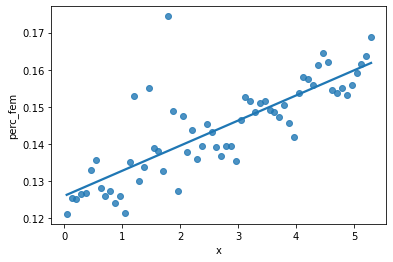

In [32]:
sns.regplot(x="x", y="perc_fem", data=df25, ci=None);

In [33]:
pf = df25.perc_fem.values.reshape(-1,1)
x = df25.x.values.reshape(-1,1)

In [34]:
# do linear regression to calculate the slope -> increase 

import numpy as np
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(x, pf)
reg.coef_

array([[0.00676485]])

The linear regression indicates that the percentage of female speaker increases by 0.68% per year.

### Check for seasonality

Seasonality in our data would mean that percentage of female speaker would be dependent on the month of the year (e.g. always the highest in Summer). To check for seasonality, we will just plot the percentage of female speakers of all the year per month in one plot and check if there is a trend detectable. 

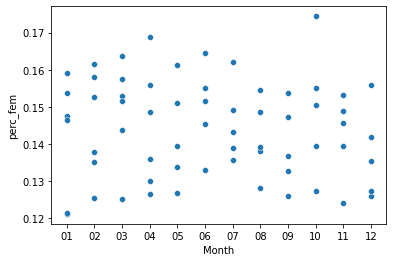

In [31]:
# check for seasonality 

sns.scatterplot(x="Month", y="perc_fem", data=df25);

The scatterplot above shows the percentage of female speaker per month of all the year and indicates that there is no seasonality (no trend) in the data. 